# Part 7 - Developing a Companion Streamlit App

In [1]:
## Importing custom function for project
%load_ext autoreload
%autoreload 2
import project_functions as pf

In [2]:
import json
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer, make_column_selector, ColumnTransformer
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
## fixing random for lesson generation
np.random.seed(321)

##import statsmodels correctly
import statsmodels.api as sm

In [3]:
plt.style.use('fivethirtyeight')

In [4]:
pd.set_option('display.max_columns',100)

In [10]:
df_tmdb = pd.read_csv("Data-Previous/tmdb/combined_tmdb_api_data.csv.gz",lineterminator='\n')
df_tmdb

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
0,tt0113026,0.0,/vMFs7nw6P0bIV1jDsQpxAieAVnH.jpg,NaN,10000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",NaN,62127.0,en,The Fantasticks,Two rural teens sing and dance their way throu...,2.491,/hfO64mXz3DgUxkBVU7no2UWRP7x.jpg,"[{'id': 51207, 'logo_path': None, 'name': 'Sul...","[{'iso_3166_1': 'US', 'name': 'United States o...",2000-09-22,0.0,86.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Try to remember the first time magic happened,The Fantasticks,0.0,5.4,21.0,NaN
1,tt0113092,0.0,NaN,NaN,0.0,"[{'id': 878, 'name': 'Science Fiction'}]",NaN,110977.0,en,For the Cause,Earth is in a state of constant war and two co...,1.974,/h9bWO13nWRGZJo4XVPiElXyrRMU.jpg,"[{'id': 7405, 'logo_path': '/rfnws0uY8rsNAsrLb...","[{'iso_3166_1': 'US', 'name': 'United States o...",2000-11-15,0.0,100.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,The ultimate showdown on a forbidden planet.,For the Cause,0.0,4.4,7.0,NaN
2,tt0116391,0.0,NaN,NaN,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",NaN,442869.0,hi,Gang,"After falling prey to underworld, four friends...",1.341,/yB5wRu4uyXXwZA3PEj8cITu0xt3.jpg,[],"[{'iso_3166_1': 'IN', 'name': 'India'}]",2000-04-14,0.0,152.0,"[{'english_name': 'Hindi', 'iso_639_1': 'hi', ...",Released,NaN,Gang,0.0,0.0,0.0,NaN
3,tt0118694,0.0,/n4GJFGzsc7NinI1VeGDXIcQjtU2.jpg,NaN,150000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",http://www.wkw-inthemoodforlove.com/,843.0,cn,花樣年華,"Hong Kong, 1962: Chow Mo-Wan and Su Li-Zhen mo...",22.411,/iYypPT4bhqXfq1b6EnmxvRt6b2Y.jpg,"[{'id': 539, 'logo_path': None, 'name': 'Block...","[{'iso_3166_1': 'CN', 'name': 'China'}, {'iso_...",2000-09-29,12854953.0,99.0,"[{'english_name': 'Cantonese', 'iso_639_1': 'c...",Released,"Feel the heat, keep the feeling burning, let t...",In the Mood for Love,0.0,8.1,1868.0,PG
4,tt0118852,0.0,NaN,NaN,0.0,"[{'id': 18, 'name': 'Drama'}]",NaN,49511.0,en,Chinese Coffee,"When Harry Levine, an aging, unsuccessful Gree...",4.889,/s6yQFnJohmvdkbeHbx6fFOTpYwR.jpg,"[{'id': 67930, 'logo_path': None, 'name': 'Cha...","[{'iso_3166_1': 'US', 'name': 'United States o...",2000-09-02,0.0,99.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,There's a fine line between friendship and bet...,Chinese Coffee,0.0,6.9,46.0,R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60125,tt9895024,0.0,/S1kutYyoyuBJKGS0mXxv2fZNbr.jpg,NaN,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 35, 'name...",NaN,834443.0,de,Heikos Welt,A son tries to save his mother's eyesight by d...,0.840,/miPUS4bMvooEWUpq8kbC0j7oCie.jpg,"[{'id': 154995, 'logo_path': None, 'name': 'AS...","[{'iso_3166_1': 'DE', 'name': 'Germany'}]",2021-09-08,0.0,118.0,"[{'english_name': 'German', 'iso_639_1': 'de',...",Released,NaN,Heiko's World,0.0,0.0,0.0,NaN
60126,tt9896876,0.0,/hMvRbT6HOqERhh3K8kXbaLz9LlZ.jpg,NaN,0.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,821493.0,en,India Sweets and Spices,A college freshman confronts her parents’ valu...,3.665,/2cUczTzLq1F99Pgiw6BWFsKnD7J.jpg,"[{'id': 737, 'logo_path': '/dK1GZ1u4our8sJW0St...","[{'iso_3166_1': 'US', 'name': 'United States o...",2021-11-19,0.0,101.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Let the aunties talk.,India Sweets and Spices,0.0,6.0,2.0,PG-13
60127,tt9898844,0.0,/q2KFBGyUSzHDhNqXEYv2LqTWVSz.jpg,NaN,0.0,"[{'id': 27, 'name': 'Horror'}]",NaN,870671.0,en,The Hunting,When a mysterious animal attack leaves a mutil...,421.143,/kvhrltQIRp1u84ao9uj52YPaWNY.jpg,"[{'id': 160303, 'logo_path': None, 'name': 'Mo...","[{'iso_3166_1': 'US', 'name': 'United States o...",2022-01-21,0.0,91.0,"[{'english_name': 'English', 'iso_639_1': 'en

In [15]:
## Checking what data we already in our Data folder using os.listdir
import os, glob
FOLDER = 'Data-for-Tableau//'
file_list = sorted(glob.glob(FOLDER+"*.csv"))
file_list

['Data-for-Tableau/collections.csv',
 'Data-for-Tableau/genres.csv',
 'Data-for-Tableau/name_basics.csv',
 'Data-for-Tableau/name_characters.csv',
 'Data-for-Tableau/name_knownForTitles.csv',
 'Data-for-Tableau/name_professions.csv',
 'Data-for-Tableau/production_companies.csv',
 'Data-for-Tableau/title_basics.csv',
 'Data-for-Tableau/title_collection.csv',
 'Data-for-Tableau/title_crew.csv',
 'Data-for-Tableau/title_genres.csv',
 'Data-for-Tableau/title_principals.csv',
 'Data-for-Tableau/title_production_company.csv',
 'Data-for-Tableau/title_ratings.csv',
 'Data-for-Tableau/tmdb.csv']

In [17]:
## Print preview of exported files.
dashes = '---'*25

for file in file_list:
    temp_df = pd.read_csv(file)
    
    
    ## Making an elipses row for concat preview
    elipses = pd.DataFrame([['...']*len(temp_df.columns)],
                       index=['...'], columns=temp_df.columns)

    print(dashes, f"[i] Preview of {file}:", dashes, sep='\n')
    display(pd.concat([temp_df.head(), elipses, temp_df.tail()]))

---------------------------------------------------------------------------
[i] Preview of Data-for-Tableau/collections.csv:
---------------------------------------------------------------------------


,collection_id,collection_name
0,0,#TemanTapiMenikah
1,1,... Cameras Collection
2,2,.hack Collection
3,3,10 giorni... - Collezione
4,4,100 Girls Collection
...,...,...
1938,1938,달마야 시리즈
1939,1939,독전 시리즈
1940,1940,동갑내기 과외하기 시리즈
1941,1941,반드시 크게 들을 것


---------------------------------------------------------------------------
[i] Preview of Data-for-Tableau/genres.csv:
---------------------------------------------------------------------------


,Genre_Name,Genre_ID
0,Action,0
1,Adult,1
2,Adventure,2
3,Animation,3
4,Biography,4
...,...,...
22,Sport,22
23,Talk-Show,23
24,Thriller,24
25,War,25


---------------------------------------------------------------------------
[i] Preview of Data-for-Tableau/name_basics.csv:
---------------------------------------------------------------------------


,nconst,primaryName,birthYear,deathYear
0,nm0000005,Ingmar Bergman,1918,2007
1,nm0000018,Kirk Douglas,1916,2020
2,nm0000041,Akira Kurosawa,1910,1998
3,nm0000054,Marilyn Monroe,1926,1962
4,nm0000080,Orson Welles,1915,1985
...,...,...,...,...
138270,nm9993103,Brianna Temple,\N,\N
138271,nm9993197,Juanjo Braulio,\N,\N
138272,nm9993311,Sadegh Khoshhal,\N,\N
138273,nm9993398,Oliviero Del Papa,\N,\N


---------------------------------------------------------------------------
[i] Preview of Data-for-Tableau/name_characters.csv:
---------------------------------------------------------------------------


,nconst,characters
0,nm0000212,Kate McKay
1,nm0413168,Leopold
2,nm0000630,Stuart Besser
3,nm0005227,Charlie McKay
4,nm0815612,Viudo
...,...,...
420407,nm8383131,Restaurant Customer
420408,nm3766704,Ana
420409,nm0107165,Rostegui
420410,nm0266723,Consejero


---------------------------------------------------------------------------
[i] Preview of Data-for-Tableau/name_knownForTitles.csv:
---------------------------------------------------------------------------


,nconst,knownForTitles
0,nm0000005,tt0050976
1,nm0000005,tt0050986
2,nm0000005,tt0083922
3,nm0000005,tt0060827
4,nm0000018,tt0050825
...,...,...
450428,nm9993398,tt10941386
450429,nm9993398,tt10270592
450430,nm9993398,tt15662942
450431,nm9993494,tt19813764


---------------------------------------------------------------------------
[i] Preview of Data-for-Tableau/name_professions.csv:
---------------------------------------------------------------------------


,nconst,profession
0,nm0000005,writer
1,nm0000005,director
2,nm0000005,actor
3,nm0000018,actor
4,nm0000018,producer
...,...,...
359880,nm9993103,camera_department
359881,nm9993197,writer
359882,nm9993311,writer
359883,nm9993398,writer


---------------------------------------------------------------------------
[i] Preview of Data-for-Tableau/production_companies.csv:
---------------------------------------------------------------------------


,company_id,company_name
0,0,# Andrea Sperling Productions
1,1,#Beardforce Films
2,2,#Sinning Works
3,3,#littlesecretfilm
4,4,(주)라인필름
...,...,...
39867,39867,타임스토리그룹
39868,39868,파파스필름
39869,39869,플랫폼픽쳐스
39870,39870,한맥문화


---------------------------------------------------------------------------
[i] Preview of Data-for-Tableau/title_basics.csv:
---------------------------------------------------------------------------


,tconst,primaryTitle,startYear,runtimeMinutes
0,tt0035423,Kate & Leopold,2001.0,118
1,tt0062336,The Tango of the Widower and Its Distorting Mi...,2020.0,70
2,tt0069049,The Other Side of the Wind,2018.0,122
3,tt0088751,The Naked Monster,2005.0,100
4,tt0096056,Crime and Punishment,2002.0,126
...,...,...,...,...
118422,tt9915436,Vida em Movimento,2019.0,70
118423,tt9915872,The Last White Witch,2019.0,97
118424,tt9916170,The Rehearsal,2019.0,51
118425,tt9916190,Safeguard,2020.0,95


---------------------------------------------------------------------------
[i] Preview of Data-for-Tableau/title_collection.csv:
---------------------------------------------------------------------------


,imdb_id,collection_id
0,tt0317219,274
1,tt0317919,963
2,tt0344854,131
3,tt0348150,1389
4,tt0362120,1256
...,...,...
3912,tt1133935,391
3913,tt2243192,1778
3914,tt3533690,1187
3915,tt3679304,1773


---------------------------------------------------------------------------
[i] Preview of Data-for-Tableau/title_crew.csv:
---------------------------------------------------------------------------


,tconst,role,nconst
0,tt0035423,director,nm0003506
1,tt0062336,director,nm0749914
2,tt0062336,director,nm0765384
3,tt0069049,director,nm0000080
4,tt0088751,director,nm0078540
...,...,...,...
330644,tt9916170,writer,nm6743460
330645,tt9916170,writer,nm3245789
330646,tt9916190,writer,nm7308376
330647,tt9916362,writer,nm1893148


---------------------------------------------------------------------------
[i] Preview of Data-for-Tableau/title_genres.csv:
---------------------------------------------------------------------------


,tconst,Genre_ID
0,tt0035423,5
1,tt0035423,10
2,tt0035423,19
3,tt0062336,8
4,tt0069049,8
...,...,...
210959,tt9916190,0
210960,tt9916190,2
210961,tt9916190,24
210962,tt9916362,8


---------------------------------------------------------------------------
[i] Preview of Data-for-Tableau/title_principals.csv:
---------------------------------------------------------------------------


,tconst,ordering,nconst,category,job
0,tt0035423,10,nm0107463,editor,\N
1,tt0035423,1,nm0000212,actress,\N
2,tt0035423,2,nm0413168,actor,\N
3,tt0035423,3,nm0000630,actor,\N
4,tt0035423,4,nm0005227,actor,\N
...,...,...,...,...,...
967317,tt9916362,5,nm1893148,director,\N
967318,tt9916362,6,nm3471432,writer,screenplay by
967319,tt9916362,7,nm2970042,producer,executive producer
967320,tt9916362,8,nm4065853,producer,producer


---------------------------------------------------------------------------
[i] Preview of Data-for-Tableau/title_production_company.csv:
---------------------------------------------------------------------------


,imdb_id,company_id
0,tt0204250,14402
1,tt0206634,36827
2,tt0206634,33356
3,tt0206634,16040
4,tt0244521,11845
...,...,...
106548,tt7098636,6068
106549,tt7098636,26073
106550,tt7098636,2167
106551,tt7637550,961


---------------------------------------------------------------------------
[i] Preview of Data-for-Tableau/title_ratings.csv:
---------------------------------------------------------------------------


,tconst,averageRating,numVotes
0,tt0035423,6.4,85981
1,tt0062336,6.4,164
2,tt0069049,6.7,7553
3,tt0088751,5.3,328
4,tt0096056,5.6,831
...,...,...,...
89677,tt9915436,7.4,5
89678,tt9915872,7.3,8
89679,tt9916170,7.0,7
89680,tt9916190,3.7,241


---------------------------------------------------------------------------
[i] Preview of Data-for-Tableau/tmdb.csv:
---------------------------------------------------------------------------


,imdb_id,budget,revenue,certification,original_language,release_date,popularity,vote_average,vote_count
0,tt0035423,48000000.0,76019000.0,PG-13,en,2001-12-25,9.183,6.3,1112
1,tt0062336,0.0,0.0,NaN,es,2020-02-21,1.4,5.3,3
2,tt0069049,12000000.0,0.0,R,en,2018-11-02,5.155,6.7,155
3,tt0088751,350000.0,0.0,NaN,en,2005-04-22,2.19,3.4,5
4,tt0093119,7500000.0,0.0,NaN,en,2020-02-17,9.226,4.4,14
...,...,...,...,...,...,...,...,...,...
78392,tt9914644,0.0,0.0,NaN,en,2018-09-11,1.821,7.0,2
78393,tt9914942,0.0,0.0,NaN,ca,2019-07-12,2.047,7.8,6
78394,tt9915872,0.0,0.0,NaN,en,NaN,0.654,0.0,0
78395,tt9916190,0.0,0.0,NaN,en,2020-09-07,3.252,6.5,2


In [23]:
df_tmdb = pd.read_csv('Data-for-Tableau/tmdb.csv')
df_tmdb

,imdb_id,budget,revenue,certification,original_language,release_date,popularity,vote_average,vote_count
0,tt0035423,48000000.0,76019000.0,PG-13,en,2001-12-25,9.183,6.3,1112
1,tt0062336,0.0,0.0,NaN,es,2020-02-21,1.400,5.3,3
2,tt0069049,12000000.0,0.0,R,en,2018-11-02,5.155,6.7,155
3,tt0088751,350000.0,0.0,NaN,en,2005-04-22,2.190,3.4,5
4,tt0093119,7500000.0,0.0,NaN,en,2020-02-17,9.226,4.4,14
...,...,...,...,...,...,...,...,...,...
78392,tt9914644,0.0,0.0,NaN,en,2018-09-11,1.821,7.0,2
78393,tt9914942,0.0,0.0,NaN,ca,2019-07-12,2.047,7.8,6
78394,tt9915872,0.0,0.0,NaN,en,NaN,0.654,0.0,0
78395,tt9916190,0.0,0.0,NaN,en,2020-09-07,3.252,6.5,2


In [22]:
df_basics = pd.read_csv("Data-for-Tableau/title_basics.csv")
df_basics

,tconst,primaryTitle,startYear,runtimeMinutes
0,tt0035423,Kate & Leopold,2001.0,118
1,tt0062336,The Tango of the Widower and Its Distorting Mi...,2020.0,70
2,tt0069049,The Other Side of the Wind,2018.0,122
3,tt0088751,The Naked Monster,2005.0,100
4,tt0096056,Crime and Punishment,2002.0,126
...,...,...,...,...
118422,tt9915436,Vida em Movimento,2019.0,70
118423,tt9915872,The Last White Witch,2019.0,97
118424,tt9916170,The Rehearsal,2019.0,51
118425,tt9916190,Safeguard,2020.0,95


In [25]:
# Merge data so far
df = pd.merge(df_basics, df_tmdb, left_on='tconst', right_on = 'imdb_id')
df

,tconst,primaryTitle,startYear,runtimeMinutes,imdb_id,budget,revenue,certification,original_language,release_date,popularity,vote_average,vote_count
0,tt0035423,Kate & Leopold,2001.0,118,tt0035423,48000000.0,76019000.0,PG-13,en,2001-12-25,9.183,6.3,1112
1,tt0062336,The Tango of the Widower and Its Distorting Mi...,2020.0,70,tt0062336,0.0,0.0,NaN,es,2020-02-21,1.400,5.3,3
2,tt0069049,The Other Side of the Wind,2018.0,122,tt0069049,12000000.0,0.0,R,en,2018-11-02,5.155,6.7,155
3,tt0088751,The Naked Monster,2005.0,100,tt0088751,350000.0,0.0,NaN,en,2005-04-22,2.190,3.4,5
4,tt0096056,Crime and Punishment,2002.0,126,tt0096056,0.0,0.0,NaN,en,2002-06-01,2.924,5.5,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...
78142,tt9914644,9/11: Escape from the Towers,2018.0,120,tt9914644,0.0,0.0,NaN,en,2018-09-11,1.821,7.0,2
78143,tt9914942,Life Without Sara Amat,2019.0,74,tt9914942,0.0,0.0,NaN,ca,2019-07-12,2.047,7.8,6
78144,tt9915872,The Last White Witch,2019.0,97,tt9915872,0.0,0.0,NaN,en,NaN,0.654,0.0,0
78145,tt9916190,Safeguard,2020.0,95,tt9916190,0.0,0.0,NaN,en,2020-09-07,3.252,6.5,2


In [28]:
df_title_genres = pd.read_csv("Data-for-Tableau/title_genres.csv")
df_title_genres

,tconst,Genre_ID
0,tt0035423,5
1,tt0035423,10
2,tt0035423,19
3,tt0062336,8
4,tt0069049,8
...,...,...
210959,tt9916190,0
210960,tt9916190,2
210961,tt9916190,24
210962,tt9916362,8


In [29]:
df_genre_names = pd.read_csv("Data-for-Tableau/genres.csv")
df_genre_names

,Genre_Name,Genre_ID
0,Action,0
1,Adult,1
2,Adventure,2
3,Animation,3
4,Biography,4
5,Comedy,5
6,Crime,6
7,Documentary,7
8,Drama,8
9,Family,9


In [31]:
df_genres = pd.merge(df_title_genres, df_genre_names,on='Genre_ID')
df_genres

,tconst,Genre_ID,Genre_Name
0,tt0035423,5,Comedy
1,tt0088751,5,Comedy
2,tt0100275,5,Comedy
3,tt0108549,5,Comedy
4,tt0118652,5,Comedy
...,...,...,...
210959,tt9490092,23,Talk-Show
210960,tt13592272,11,Game-Show
210961,tt18884646,11,Game-Show
210962,tt25762168,11,Game-Show


### Adding Genres As OHE Encoded Features

In [34]:
genre_list = sorted(df_genres['Genre_Name'].unique())
genre_list

['Action',
 'Adult',
 'Adventure',
 'Animation',
 'Biography',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'Game-Show',
 'History',
 'Horror',
 'Music',
 'Musical',
 'Mystery',
 'News',
 'Reality-TV',
 'Romance',
 'Sci-Fi',
 'Short',
 'Sport',
 'Talk-Show',
 'Thriller',
 'War',
 'Western']

In [43]:
tconst_genres = df_genres.groupby("tconst")['Genre_Name'].unique()
tconst_genres = tconst_genres.apply(lambda x: ",".join(x))
tconst_genres

tconst
tt0035423       Comedy,Fantasy,Romance
tt0062336                        Drama
tt0069049                        Drama
tt0088751         Comedy,Horror,Sci-Fi
tt0096056                        Drama
                       ...            
tt9915436                  Documentary
tt9915872         Comedy,Fantasy,Drama
tt9916170                        Drama
tt9916190    Action,Adventure,Thriller
tt9916362                Drama,History
Name: Genre_Name, Length: 118427, dtype: object

In [49]:
## merge df and tconst_genres

df_combined = pd.merge(df, tconst_genres.reset_index())
df_combined

,tconst,primaryTitle,startYear,runtimeMinutes,imdb_id,budget,revenue,certification,original_language,release_date,popularity,vote_average,vote_count,Genre_Name
0,tt0035423,Kate & Leopold,2001.0,118,tt0035423,48000000.0,76019000.0,PG-13,en,2001-12-25,9.183,6.3,1112,"Comedy,Fantasy,Romance"
1,tt0062336,The Tango of the Widower and Its Distorting Mi...,2020.0,70,tt0062336,0.0,0.0,NaN,es,2020-02-21,1.400,5.3,3,Drama
2,tt0069049,The Other Side of the Wind,2018.0,122,tt0069049,12000000.0,0.0,R,en,2018-11-02,5.155,6.7,155,Drama
3,tt0088751,The Naked Monster,2005.0,100,tt0088751,350000.0,0.0,NaN,en,2005-04-22,2.190,3.4,5,"Comedy,Horror,Sci-Fi"
4,tt0096056,Crime and Punishment,2002.0,126,tt0096056,0.0,0.0,NaN,en,2002-06-01,2.924,5.5,11,Drama
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78142,tt9914644,9/11: Escape from the Towers,2018.0,120,tt9914644,0.0,0.0,NaN,en,2018-09-11,1.821,7.0,2,Documentary
78143,tt9914942,Life Without Sara Amat,2019.0,74,tt9914942,0.0,0.0,NaN,ca,2019-07-12,2.047,7.8,6,Drama
78144,tt9915872,The Last White Witch,2019.0,97,tt9915872,0.0,0.0,NaN,en,NaN,0.654,0.0,0,"Comedy,Fantasy,Drama"
78145,tt9916190,Safeguard,2020.0,95,tt9916190,0.0,0.0,NaN,en,2020-09-07,3.252,6.5,2,"Action,Adventure,Thriller"


In [50]:
genre = genre_list[0]
genre

'Action'

In [52]:
df_combined['Genre_Name'].str.contains(genre)

0        False
1        False
2        False
3        False
4        False
         ...  
78142    False
78143    False
78144    False
78145     True
78146    False
Name: Genre_Name, Length: 78147, dtype: bool

In [54]:
df_combined[f'Genre_{genre}'] = df_combined['Genre_Name'].str.contains(genre)
df_combined

,tconst,primaryTitle,startYear,runtimeMinutes,imdb_id,budget,revenue,certification,original_language,release_date,popularity,vote_average,vote_count,Genre_Name,Genre_Action
0,tt0035423,Kate & Leopold,2001.0,118,tt0035423,48000000.0,76019000.0,PG-13,en,2001-12-25,9.183,6.3,1112,"Comedy,Fantasy,Romance",False
1,tt0062336,The Tango of the Widower and Its Distorting Mi...,2020.0,70,tt0062336,0.0,0.0,NaN,es,2020-02-21,1.400,5.3,3,Drama,False
2,tt0069049,The Other Side of the Wind,2018.0,122,tt0069049,12000000.0,0.0,R,en,2018-11-02,5.155,6.7,155,Drama,False
3,tt0088751,The Naked Monster,2005.0,100,tt0088751,350000.0,0.0,NaN,en,2005-04-22,2.190,3.4,5,"Comedy,Horror,Sci-Fi",False
4,tt0096056,Crime and Punishment,2002.0,126,tt0096056,0.0,0.0,NaN,en,2002-06-01,2.924,5.5,11,Drama,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78142,tt9914644,9/11: Escape from the Towers,2018.0,120,tt9914644,0.0,0.0,NaN,en,2018-09-11,1.821,7.0,2,Documentary,False
78143,tt9914942,Life Without Sara Amat,2019.0,74,tt9914942,0.0,0.0,NaN,ca,2019-07-12,2.047,7.8,6,Drama,False
78144,tt9915872,The Last White Witch,2019.0,97,tt9915872,0.0,0.0,NaN,en,NaN,0.654,0.0,0,"Comedy,Fantasy,Drama",False
78145,tt9916190,Safeguard,2020.0,95,tt9916190,0.0,0.0,NaN,en,2020-09-07,3.252,6.5,2,"Action,Adventure,Thriller",True


In [55]:
for genre in genre_list:
    df_combined[f'Genre_{genre}'] = df_combined['Genre_Name'].str.contains(genre)
df_combined

,tconst,primaryTitle,startYear,runtimeMinutes,imdb_id,budget,revenue,certification,original_language,release_date,popularity,vote_average,vote_count,Genre_Name,Genre_Action,Genre_Adult,Genre_Adventure,Genre_Animation,Genre_Biography,Genre_Comedy,Genre_Crime,Genre_Documentary,Genre_Drama,Genre_Family,Genre_Fantasy,Genre_Game-Show,Genre_History,Genre_Horror,Genre_Music,Genre_Musical,Genre_Mystery,Genre_News,Genre_Reality-TV,Genre_Romance,Genre_Sci-Fi,Genre_Short,Genre_Sport,Genre_Talk-Show,Genre_Thriller,Genre_War,Genre_Western
0,tt0035423,Kate & Leopold,2001.0,118,tt0035423,48000000.0,76019000.0,PG-13,en,2001-12-25,9.183,6.3,1112,"Comedy,Fantasy,Romance",False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
1,tt0062336,The Tango of the Widower and Its Distorting Mi...,2020.0,70,tt0062336,0.0,0.0,NaN,es,2020-02-21,1.400,5.3,3,Drama,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,tt0069049,The Other Side of the Wind,2018.0,122,tt0069049,12000000.0,0.0,R,en,2018-11-02,5.155,6.7,155,Drama,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,tt0088751,The Naked Monster,2005.0,100,tt0088751,350000.0,0.0,NaN,en,2005-04-22,2.190,3.4,5,"Comedy,Horror,Sci-Fi",False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False
4,tt0096056,Crime and Punishment,2002.0,126,tt0096056,0.0,0.0,NaN,en,2002-06-01,2.924,5.5,11,Drama,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78142,tt9914644,9/11: Escape from the Towers,2018.0,120,tt9914644,0.0,0.0,NaN,en,2018-09-11,1.821,7.0,2,Documentary,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
78143,tt9914942,Life Without Sara Amat,2019.0,74,tt9914942,0.0,0.0,NaN,ca,2019-07-12,2.047,7.8,6,Drama,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
78144,tt9915872,The Last White Witch,2019.0,97,tt9915872,0.0,0.0,NaN,en,NaN,0.654,0.0,0,"Comedy,Fantasy,Drama",False,False,False,False,False,True,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
78145,tt9916190,Safeguard,2020.0,95,tt9916190,0.0,0.0,NaN,en,2020-09-07,3.252,6.5,2,"Action,Adventure,Thriller",True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False


In [66]:
zero_budget = df_combined['budget']==0
print(zero_budget.sum())

zero_revenue = df_combined['revenue']==0
print(zero_revenue.sum())



65991
70319


In [67]:
filter_zeros = zero_budget | zero_revenue
filter_zeros.sum()/len(filter_zeros)

0.9333691632436306

In [68]:
df_combined = df_combined[~filter_zeros]
df_combined

,tconst,primaryTitle,startYear,runtimeMinutes,imdb_id,budget,revenue,certification,original_language,release_date,popularity,vote_average,vote_count,Genre_Name,Genre_Action,Genre_Adult,Genre_Adventure,Genre_Animation,Genre_Biography,Genre_Comedy,Genre_Crime,Genre_Documentary,Genre_Drama,Genre_Family,Genre_Fantasy,Genre_Game-Show,Genre_History,Genre_Horror,Genre_Music,Genre_Musical,Genre_Mystery,Genre_News,Genre_Reality-TV,Genre_Romance,Genre_Sci-Fi,Genre_Short,Genre_Sport,Genre_Talk-Show,Genre_Thriller,Genre_War,Genre_Western
0,tt0035423,Kate & Leopold,2001.0,118,tt0035423,48000000.0,76019000.0,PG-13,en,2001-12-25,9.183,6.3,1112,"Comedy,Fantasy,Romance",False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
14,tt0118589,Glitter,2001.0,104,tt0118589,22000000.0,5271670.0,PG-13,en,2001-09-21,6.391,4.6,115,"Romance,Drama,Music",False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False
16,tt0118694,In the Mood for Love,2000.0,98,tt0118694,150000.0,12855000.0,PG,cn,2000-09-29,14.944,8.1,1879,"Romance,Drama",False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
30,tt0120467,Vulgar,2000.0,87,tt0120467,120000.0,14904.0,R,en,2002-04-26,3.692,5.4,41,"Drama,Crime,Thriller",False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
35,tt0120630,Chicken Run,2000.0,84,tt0120630,45000000.0,224835000.0,G,en,2000-06-21,35.780,6.7,4009,"Comedy,Adventure,Animation",False,False,True,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77949,tt9839038,Jim Button and the Wild 13,2020.0,110,tt9839038,20000000.0,6700000.0,NaN,de,2020-10-01,3.445,6.1,16,"Comedy,Adventure,Family",False,False,True,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
77957,tt9844322,Kaamelott: First Installment,2021.0,120,tt9844322,17516200.0,19002000.0,NaN,fr,2021-07-21,8.803,6.9,463,"Comedy,Fantasy,Adventure",False,False,True,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
77961,tt9844522,Escape Room: Tournament of Champions,2021.0,88,tt9844522,15000000.0,44889000.0,PG-13,en,2021-07-01,100.556,6.7,1183,"Horror,Action,Adventure",True,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
78054,tt9877170,Malang,2020.0,135,tt9877170,7907530.0,11136400.0,NaN,hi,2020-02-06,3.486,7.3,30,"Drama,Action,Crime",True,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [70]:
df_combined = df_combined.copy()

In [73]:
df_combined['profit'] =  df_combined['revenue'] -  df_combined['budget']
df_combined.head()

,tconst,primaryTitle,startYear,runtimeMinutes,imdb_id,budget,revenue,certification,original_language,release_date,popularity,vote_average,vote_count,Genre_Name,Genre_Action,Genre_Adult,Genre_Adventure,Genre_Animation,Genre_Biography,Genre_Comedy,Genre_Crime,Genre_Documentary,Genre_Drama,Genre_Family,Genre_Fantasy,Genre_Game-Show,Genre_History,Genre_Horror,Genre_Music,Genre_Musical,Genre_Mystery,Genre_News,Genre_Reality-TV,Genre_Romance,Genre_Sci-Fi,Genre_Short,Genre_Sport,Genre_Talk-Show,Genre_Thriller,Genre_War,Genre_Western,profit
0,tt0035423,Kate & Leopold,2001.0,118,tt0035423,48000000.0,76019000.0,PG-13,en,2001-12-25,9.183,6.3,1112,"Comedy,Fantasy,Romance",False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,28019000.0
14,tt0118589,Glitter,2001.0,104,tt0118589,22000000.0,5271670.0,PG-13,en,2001-09-21,6.391,4.6,115,"Romance,Drama,Music",False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,-16728330.0
16,tt0118694,In the Mood for Love,2000.0,98,tt0118694,150000.0,12855000.0,PG,cn,2000-09-29,14.944,8.1,1879,"Romance,Drama",False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,12705000.0
30,tt0120467,Vulgar,2000.0,87,tt0120467,120000.0,14904.0,R,en,2002-04-26,3.692,5.4,41,"Drama,Crime,Thriller",False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,-105096.0
35,tt0120630,Chicken Run,2000.0,84,tt0120630,45000000.0,224835000.0,G,en,2000-06-21,35.780,6.7,4009,"Comedy,Adventure,Animation",False,False,True,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,179835000.0


In [78]:
df_combined['ROI'] =  (df_combined['revenue'] -  df_combined['budget']) / (df_combined['budget'])
df_combined.head()

,tconst,primaryTitle,startYear,runtimeMinutes,imdb_id,budget,revenue,certification,original_language,release_date,popularity,vote_average,vote_count,Genre_Name,Genre_Action,Genre_Adult,Genre_Adventure,Genre_Animation,Genre_Biography,Genre_Comedy,Genre_Crime,Genre_Documentary,Genre_Drama,Genre_Family,Genre_Fantasy,Genre_Game-Show,Genre_History,Genre_Horror,Genre_Music,Genre_Musical,Genre_Mystery,Genre_News,Genre_Reality-TV,Genre_Romance,Genre_Sci-Fi,Genre_Short,Genre_Sport,Genre_Talk-Show,Genre_Thriller,Genre_War,Genre_Western,profit,ROI
0,tt0035423,Kate & Leopold,2001.0,118,tt0035423,48000000.0,76019000.0,PG-13,en,2001-12-25,9.183,6.3,1112,"Comedy,Fantasy,Romance",False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,28019000.0,0.583729
14,tt0118589,Glitter,2001.0,104,tt0118589,22000000.0,5271670.0,PG-13,en,2001-09-21,6.391,4.6,115,"Romance,Drama,Music",False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,-16728330.0,-0.760379
16,tt0118694,In the Mood for Love,2000.0,98,tt0118694,150000.0,12855000.0,PG,cn,2000-09-29,14.944,8.1,1879,"Romance,Drama",False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,12705000.0,84.700000
30,tt0120467,Vulgar,2000.0,87,tt0120467,120000.0,14904.0,R,en,2002-04-26,3.692,5.4,41,"Drama,Crime,Thriller",False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,-105096.0,-0.875800
35,tt0120630,Chicken Run,2000.0,84,tt0120630,45000000.0,224835000.0,G,en,2000-06-21,35.780,6.7,4009,"Comedy,Adventure,Animation",False,False,True,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,179835000.0,3.996333


# BOOKMARK: Use df_combined to start streamlit dev

### Exlcluding:
- Movies with NR certification

In [102]:
df_combined = df_combined.loc[df_combined['certification'] != "NR"]
df_combined

,tconst,primaryTitle,startYear,runtimeMinutes,imdb_id,budget,revenue,certification,original_language,release_date,popularity,vote_average,vote_count,Genre_Name,Genre_Action,Genre_Adult,Genre_Adventure,Genre_Animation,Genre_Biography,Genre_Comedy,Genre_Crime,Genre_Documentary,Genre_Drama,Genre_Family,Genre_Fantasy,Genre_Game-Show,Genre_History,Genre_Horror,Genre_Music,Genre_Musical,Genre_Mystery,Genre_News,Genre_Reality-TV,Genre_Romance,Genre_Sci-Fi,Genre_Short,Genre_Sport,Genre_Talk-Show,Genre_Thriller,Genre_War,Genre_Western,profit,ROI
0,tt0035423,Kate & Leopold,2001.0,118,tt0035423,48000000.0,76019000.0,PG-13,en,2001-12-25,9.183,6.3,1112,"Comedy,Fantasy,Romance",False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,28019000.0,0.583729
14,tt0118589,Glitter,2001.0,104,tt0118589,22000000.0,5271670.0,PG-13,en,2001-09-21,6.391,4.6,115,"Romance,Drama,Music",False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,-16728330.0,-0.760379
16,tt0118694,In the Mood for Love,2000.0,98,tt0118694,150000.0,12855000.0,PG,cn,2000-09-29,14.944,8.1,1879,"Romance,Drama",False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,12705000.0,84.700000
30,tt0120467,Vulgar,2000.0,87,tt0120467,120000.0,14904.0,R,en,2002-04-26,3.692,5.4,41,"Drama,Crime,Thriller",False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,-105096.0,-0.875800
35,tt0120630,Chicken Run,2000.0,84,tt0120630,45000000.0,224835000.0,G,en,2000-06-21,35.780,6.7,4009,"Comedy,Adventure,Animation",False,False,True,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,179835000.0,3.996333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77949,tt9839038,Jim Button and the Wild 13,2020.0,110,tt9839038,20000000.0,6700000.0,NaN,de,2020-10-01,3.445,6.1,16,"Comedy,Adventure,Family",False,False,True,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,-13300000.0,-0.665000
77957,tt9844322,Kaamelott: First Installment,2021.0,120,tt9844322,17516200.0,19002000.0,NaN,fr,2021-07-21,8.803,6.9,463,"Comedy,Fantasy,Adventure",False,False,True,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,1485800.0,0.084824
77961,tt9844522,Escape Room: Tournament of Champions,2021.0,88,tt9844522,15000000.0,44889000.0,PG-13,en,2021-07-01,100.556,6.7,1183,"Horror,Action,Adventure",True,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,29889000.0,1.992600
78054,tt9877170,Malang,2020.0,135,tt9877170,7907530.0,11136400.0,NaN,hi,2020-02-06,3.486,7.3,30,"Drama,Action,Crime",True,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,3228870.0,0.408329


In [110]:
df_combined['certification'].value_counts(dropna=False)

R        1725
PG-13    1472
NaN      1205
PG        539
G          97
NC-17      16
R           1
Name: certification, dtype: int64

In [103]:
# (df_combined['certification'] == "NR").sum()

In [111]:
df_combined = df_combined[df_combined['certification'].notna()]
df_combined

,tconst,primaryTitle,startYear,runtimeMinutes,imdb_id,budget,revenue,certification,original_language,release_date,popularity,vote_average,vote_count,Genre_Name,Genre_Action,Genre_Adult,Genre_Adventure,Genre_Animation,Genre_Biography,Genre_Comedy,Genre_Crime,Genre_Documentary,Genre_Drama,Genre_Family,Genre_Fantasy,Genre_Game-Show,Genre_History,Genre_Horror,Genre_Music,Genre_Musical,Genre_Mystery,Genre_News,Genre_Reality-TV,Genre_Romance,Genre_Sci-Fi,Genre_Short,Genre_Sport,Genre_Talk-Show,Genre_Thriller,Genre_War,Genre_Western,profit,ROI
0,tt0035423,Kate & Leopold,2001.0,118,tt0035423,48000000.0,76019000.0,PG-13,en,2001-12-25,9.183,6.3,1112,"Comedy,Fantasy,Romance",False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,28019000.0,0.583729
14,tt0118589,Glitter,2001.0,104,tt0118589,22000000.0,5271670.0,PG-13,en,2001-09-21,6.391,4.6,115,"Romance,Drama,Music",False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,-16728330.0,-0.760379
16,tt0118694,In the Mood for Love,2000.0,98,tt0118694,150000.0,12855000.0,PG,cn,2000-09-29,14.944,8.1,1879,"Romance,Drama",False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,12705000.0,84.700000
30,tt0120467,Vulgar,2000.0,87,tt0120467,120000.0,14904.0,R,en,2002-04-26,3.692,5.4,41,"Drama,Crime,Thriller",False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,-105096.0,-0.875800
35,tt0120630,Chicken Run,2000.0,84,tt0120630,45000000.0,224835000.0,G,en,2000-06-21,35.780,6.7,4009,"Comedy,Adventure,Animation",False,False,True,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,179835000.0,3.996333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77361,tt9624766,Jiu Jitsu,2020.0,102,tt9624766,23000000.0,99924.0,R,en,2020-11-20,120.685,5.0,482,"Sci-Fi,Action,Thriller",True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,-22900076.0,-0.995655
77394,tt9639470,Last Night in Soho,2021.0,116,tt9639470,43000000.0,22957600.0,R,en,2021-10-21,132.579,7.5,1641,"Drama,Horror,Mystery",False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,-20042400.0,-0.466102
77488,tt9664108,Voyagers,2021.0,108,tt9664108,20000000.0,4284900.0,PG-13,en,2021-04-08,100.160,6.1,513,"Sci-Fi,Adventure,Thriller",False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,-15715100.0,-0.785755
77775,tt9770150,Nomadland,2020.0,107,tt9770150,5000000.0,14784100.0,R,en,2020-12-04,24.128,7.3,2244,Drama,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,9784100.0,1.956820


In [115]:
import os
folder ="app-assets/"
os.makedirs(folder, exist_ok=True)

fpath = folder+"movie-data-streamlit.csv"
fpath

'app-assets/movie-data-streamlit.csv'

In [116]:
df_combined.to_csv(fpath, index=False)

# Prep Visualizations

In [117]:
df = pd.read_csv(fpath)
df

,tconst,primaryTitle,startYear,runtimeMinutes,imdb_id,budget,revenue,certification,original_language,release_date,popularity,vote_average,vote_count,Genre_Name,Genre_Action,Genre_Adult,Genre_Adventure,Genre_Animation,Genre_Biography,Genre_Comedy,Genre_Crime,Genre_Documentary,Genre_Drama,Genre_Family,Genre_Fantasy,Genre_Game-Show,Genre_History,Genre_Horror,Genre_Music,Genre_Musical,Genre_Mystery,Genre_News,Genre_Reality-TV,Genre_Romance,Genre_Sci-Fi,Genre_Short,Genre_Sport,Genre_Talk-Show,Genre_Thriller,Genre_War,Genre_Western,profit,ROI
0,tt0035423,Kate & Leopold,2001.0,118,tt0035423,48000000.0,76019000.0,PG-13,en,2001-12-25,9.183,6.3,1112,"Comedy,Fantasy,Romance",False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,28019000.0,0.583729
1,tt0118589,Glitter,2001.0,104,tt0118589,22000000.0,5271670.0,PG-13,en,2001-09-21,6.391,4.6,115,"Romance,Drama,Music",False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,-16728330.0,-0.760379
2,tt0118694,In the Mood for Love,2000.0,98,tt0118694,150000.0,12855000.0,PG,cn,2000-09-29,14.944,8.1,1879,"Romance,Drama",False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,12705000.0,84.700000
3,tt0120467,Vulgar,2000.0,87,tt0120467,120000.0,14904.0,R,en,2002-04-26,3.692,5.4,41,"Drama,Crime,Thriller",False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,-105096.0,-0.875800
4,tt0120630,Chicken Run,2000.0,84,tt0120630,45000000.0,224835000.0,G,en,2000-06-21,35.780,6.7,4009,"Comedy,Adventure,Animation",False,False,True,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,179835000.0,3.996333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3845,tt9624766,Jiu Jitsu,2020.0,102,tt9624766,23000000.0,99924.0,R,en,2020-11-20,120.685,5.0,482,"Sci-Fi,Action,Thriller",True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,-22900076.0,-0.995655
3846,tt9639470,Last Night in Soho,2021.0,116,tt9639470,43000000.0,22957600.0,R,en,2021-10-21,132.579,7.5,1641,"Drama,Horror,Mystery",False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,-20042400.0,-0.466102
3847,tt9664108,Voyagers,2021.0,108,tt9664108,20000000.0,4284900.0,PG-13,en,2021-04-08,100.160,6.1,513,"Sci-Fi,Adventure,Thriller",False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,-15715100.0,-0.785755
3848,tt9770150,Nomadland,2020.0,107,tt9770150,5000000.0,14784100.0,R,en,2020-12-04,24.128,7.3,2244,Drama,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,9784100.0,1.956820


In [118]:
import plotly.express as px
import plotly.io as pio
pio.templates

Templates configuration
-----------------------
    Default template: 'seaborn'
    Available templates:
        ['ggplot2', 'seaborn', 'simple_white', 'plotly',
         'plotly_white', 'plotly_dark', 'presentation', 'xgridoff',
         'ygridoff', 'gridon', 'none']

In [119]:
pio.templates.default= 'seaborn'

In [120]:
df.columns

Index(['tconst', 'primaryTitle', 'startYear', 'runtimeMinutes', 'imdb_id',
       'budget', 'revenue', 'certification', 'original_language',
       'release_date', 'popularity', 'vote_average', 'vote_count',
       'Genre_Name', 'Genre_Action', 'Genre_Adult', 'Genre_Adventure',
       'Genre_Animation', 'Genre_Biography', 'Genre_Comedy', 'Genre_Crime',
       'Genre_Documentary', 'Genre_Drama', 'Genre_Family', 'Genre_Fantasy',
       'Genre_Game-Show', 'Genre_History', 'Genre_Horror', 'Genre_Music',
       'Genre_Musical', 'Genre_Mystery', 'Genre_News', 'Genre_Reality-TV',
       'Genre_Romance', 'Genre_Sci-Fi', 'Genre_Short', 'Genre_Sport',
       'Genre_Talk-Show', 'Genre_Thriller', 'Genre_War', 'Genre_Western',
       'profit', 'ROI'],
      dtype='object')

In [121]:
hover_cols = ['tconst','budget','revenue','certification']
hover_name = 'primaryTitle'

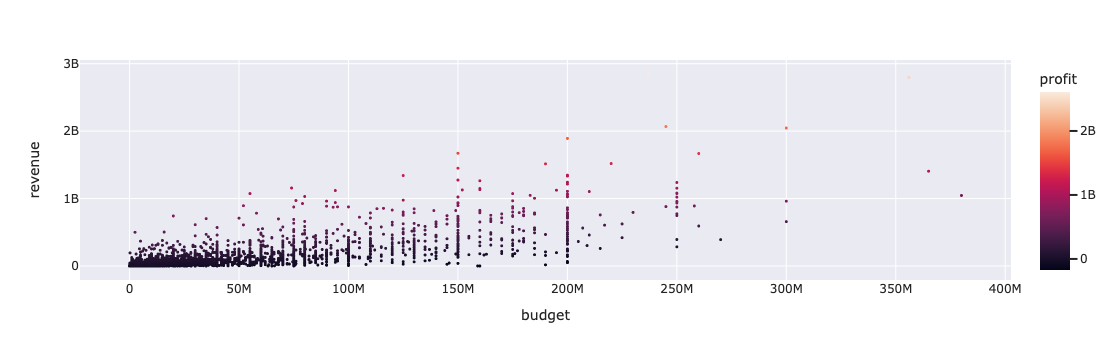

In [122]:
fig = px.scatter(df,x='budget',y='revenue', color='profit', hover_data=hover_cols, hover_name=hover_name )
fig.update_traces(marker=dict(size=3))

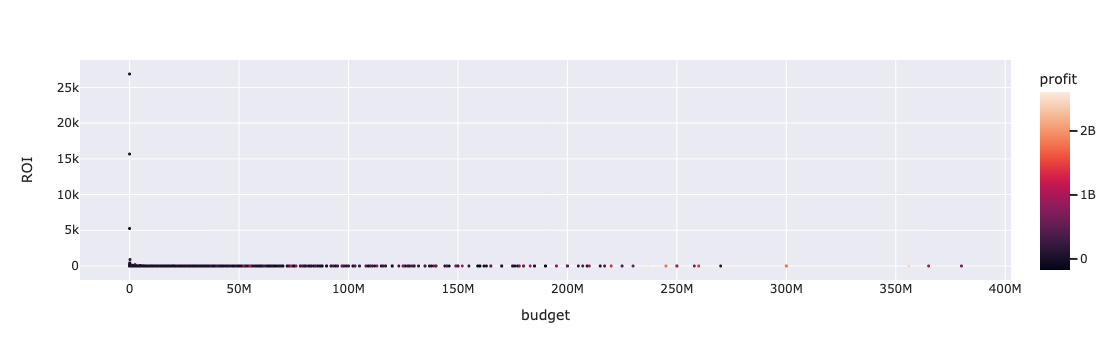

In [123]:
fig = px.scatter(df,x='budget',y='ROI', color='profit' , hover_data=hover_cols, hover_name=hover_name )
fig.update_traces(marker=dict(size=3))